In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics

%matplotlib inline
pd.set_option('max_colwidth',1000)
color = sns.color_palette()
sns.set_style('darkgrid')

In [2]:
# Load the loan data
df = pd.read_pickle('data_cleaned.pkl')
df.reset_index(drop=True, inplace=True)

In [3]:
# Categorical features from data-cleanup.ipynb
cat_features = ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 
                'purpose', 'addr_state', 'initial_list_status', 'application_type', 'disbursement_method']

for y in cat_features:
    # print(y + " has " + str(len(df[y].unique())) + " unique values")
    df = df.join(pd.get_dummies(df[y], prefix=y))
    df.drop(y, axis=1, inplace=True)

# Remove int_rate also
df.drop('int_rate', axis=1, inplace=True)

In [4]:
# Encode the loan_status to numerical values
# Fully Paid = 1
# Charged Off = 0
df['loan_status'] = df['loan_status'].apply(lambda x: int(x == 'Fully Paid'))

In [5]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,annual_inc,loan_status,zip_code,dti,delinq_2yrs,...,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay
count,830685.000000,830685.000000,830685.000000,830685.000000,830685.000000,8.306850e+05,830685.000000,830685.000000,830685.000000,830685.000000,...,830685.000000,830685.000000,830685.000000,830685.000000,830685.000000,830685.000000,830685.000000,830685.000000,830685.000000,830685.000000
mean,14325.615727,14312.102722,14279.615080,41.796970,436.406142,7.529807e+04,0.793832,518.830457,17.395740,0.307000,...,0.022308,0.012747,0.004003,0.002244,0.504204,0.495796,0.994908,0.005092,0.998617,0.001383
std,8509.996557,8503.337725,8508.362095,10.272417,255.953656,6.557081e+04,0.404553,314.240924,8.984933,0.857069,...,0.147684,0.112182,0.063140,0.047317,0.499983,0.499983,0.071178,0.071178,0.037166,0.037166
min,500.000000,500.000000,0.000000,36.000000,4.000000,0.000000e+00,0.000000,7.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,8000.000000,7975.000000,36.000000,251.000000,4.520000e+04,1.000000,234.000000,11.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,12000.000000,12000.000000,12000.000000,36.000000,377.000000,6.500000e+04,1.000000,481.000000,17.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,20000.000000,20000.000000,20000.000000,36.000000,576.000000,9.000000e+04,1.000000,823.000000,23.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,40000.000000,40000.000000,40000.000000,60.000000,1714.000000,9.550000e+06,1.000000,999.000000,999.000000,39.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
from sklearn.utils import shuffle
df = shuffle(df)

In [7]:
# Correlation Analysis
# most correlated features
corrmat = df.corr()
# top_corr_features = corrmat.index[abs(corrmat["int_rate"])>0.5]
# plt.figure(figsize=(100,100))
# g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
# sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest")
    ax1.grid(True)
    plt.title('Feature Correlation')
    # labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    # ax1.set_xticklabels(labels,fontsize=6)
    # ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax) # , ticks=[.75,.8,.85,.90,.95,1])
    plt.figure(figsize=(100,100))
    plt.show()

# correlation_matrix(df)

In [8]:
corrmat['loan_status']

loan_amnt                       -0.064021
funded_amnt                     -0.064132
funded_amnt_inv                 -0.063865
term                            -0.177266
installment                     -0.046476
annual_inc                       0.046371
loan_status                      1.000000
zip_code                         0.016527
dti                             -0.120715
delinq_2yrs                     -0.021748
inq_last_6mths                  -0.058934
mths_since_last_delinq          -0.005921
mths_since_last_record          -0.023344
open_acc                        -0.034570
pub_rec                         -0.023285
revol_bal                        0.013427
revol_util                      -0.072684
total_acc                        0.011113
collections_12_mths_ex_med      -0.018195
mths_since_last_major_derog     -0.025663
acc_now_delinq                  -0.007142
tot_coll_amt                    -0.000020
tot_cur_bal                      0.061666
open_acc_6m                     -0

In [9]:
# top_corr_features = corrmat.loc[abs(corrmat['loan_status']) > 0.1]
# plt.figure(figsize=(10,10))
# sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')
# sns.heatmap(top_corr_features.corr(), annot=True, cmap='RdYlGn')

In [10]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(type(get_top_abs_correlations(df, 3)))
print(get_top_abs_correlations(df, 50))

Top Absolute Correlations
<class 'pandas.core.series.Series'>
disbursement_method_Cash     disbursement_method_DirectPay     1.000000
application_type_Individual  application_type_Joint App        1.000000
initial_list_status_f        initial_list_status_w             1.000000
loan_amnt                    funded_amnt                       0.999263
funded_amnt                  funded_amnt_inv                   0.998497
loan_amnt                    funded_amnt_inv                   0.997613
num_actv_rev_tl              num_rev_tl_bal_gt_0               0.986859
tot_cur_bal                  tot_hi_cred_lim                   0.981071
funded_amnt                  installment                       0.954615
loan_amnt                    installment                       0.953506
funded_amnt_inv              installment                       0.953042
sec_app_open_acc             sec_app_num_rev_accts             0.923560
il_util                      all_util                          0.900204
op

In [11]:
# https://www.kaggle.com/vjgupta/reach-top-10-with-simple-model-on-housing-prices
    
# c = df.corr().abs()
# s = c.unstack()
# so = s.sort_values(ascending=False).drop_duplicates()

# with pd.option_context('display.max_rows', 1000, 'display.max_columns', 3):
  # print(so)

/home/anilraj/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


mu = 0.79 and sigma = 0.40


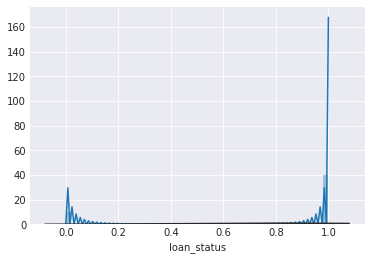

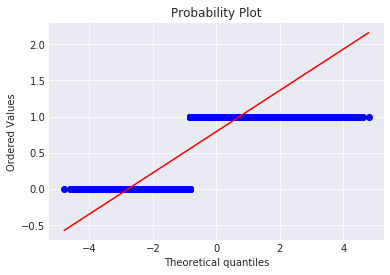

In [12]:
# Target Variable 
def check_skewness(col):
    sns.distplot(df[col], fit=norm)
    fig = plt.figure()
    res = stats.probplot(df[col], plot=plt)
    (mu, sigma) = norm.fit(df[col])
    print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

check_skewness('loan_status')

In [13]:
# Highly skewed features

skewed_features = df.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skewed_features})
skewness

,Skew
tot_coll_amt,868.224262
addr_state_IA,344.479732
sec_app_chargeoff_within_12_mths,291.800358
sec_app_collections_12_mths_ex_med,289.936477
sec_app_open_act_il,66.269959
sec_app_mths_since_last_major_derog,61.649797
sec_app_inq_last_6mths,59.804717
total_rev_hi_lim,57.101681
revol_bal_joint,51.782773
purpose_educational,50.920438


In [14]:
skewness = skewness[abs(skewness) > 0.75]
print('There are {} skewed features to Box Cox transform'.format(skewness.shape[0]))

There are 221 skewed features to Box Cox transform


In [15]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lam)

In [16]:
df = pd.get_dummies(df)
print(df.shape)
df

(830685, 221)


,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,annual_inc,loan_status,zip_code,dti,delinq_2yrs,...,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay
629723,23.598505,23.598505,23.598505,5.684507,10.847718,31.120480,0.730463,11.966746,2.750250,0.000000,...,0.000000,0.000000,0.0,0.0,0.730463,0.000000,0.730463,0.0,0.730463,0.000000
610837,21.704788,21.704788,21.704788,4.792130,10.458983,26.008617,0.000000,12.094249,4.492018,0.000000,...,0.730463,0.000000,0.0,0.0,0.730463,0.000000,0.730463,0.0,0.730463,0.000000
540583,23.784389,23.784389,23.784389,5.684507,10.697217,29.588763,0.730463,11.673285,2.055642,0.000000,...,0.000000,0.000000,0.0,0.0,0.730463,0.000000,0.730463,0.0,0.730463,0.000000
7294,18.650558,18.650558,18.650558,4.792130,8.385498,26.248623,0.730463,11.459458,4.071754,0.000000,...,0.000000,0.000000,0.0,0.0,0.730463,0.000000,0.730463,0.0,0.730463,0.000000
289103,21.772525,21.772525,21.772525,5.684507,10.007158,27.320151,0.730463,10.745316,4.697012,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.730463,0.730463,0.0,0.730463,0.000000
192185,17.630992,17.630992,17.630992,5.684507,7.216434,28.057555,0.730463,9.371164,2.750250,0.000000,...,0.000000,0.000000,0.0,0.0,0.730463,0.000000,0.730463,0.0,0.730463,0.000000
556785,22.869658,22.869658,22.869658,5.684507,10.425436,28.057555,0.000000,8.453930,4.071754,0.000000,...,0.000000,0.000000,0.0,0.0,0.730463,0.000000,0.730463,0.0,0.730463,0.000000
429905,24.306440,24.306440,24.306440,4.792130,12.071430,31.666792,0.730463,10.805463,4.137711,0.730463,...,0.000000,0.000000,0.0,0.0,0.000000,0.730463,0.730463,0.0,0.730463,0.000000
432194,25.360669,25.360669,25.360669,5.684507,11.768842,32.327599,0.730463,12.004933,3.340760,0.730463,...,0.000000,0.000000,0.0,0.0,0.000000,0.730463,0.730463,0.0,0.730463,0.000000
479432,19.000645,19.000645,18.976521,4.792130,8.906024,23.784389,0.730463,7.749778,4.322948,0.000000,...,0.000000,0.000000,0.0,0.0,0.730463,0.000000,0.730463,0.0,0.730463,0.000000


In [17]:
# Produce a scatter matrix for each pair of features in the data
# pd.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [18]:
# Running corr() function to see how the features are correlated.
df.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,annual_inc,loan_status,zip_code,dti,delinq_2yrs,...,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay
loan_amnt,1.000000,0.999482,0.991030,0.391044,0.973896,0.473329,-0.067809,-0.008859,0.059263,0.003954,...,0.002824,-0.007850,-0.002438,0.003678,-0.072259,0.072259,-0.039187,0.039187,0.003903,-0.003903
funded_amnt,0.999482,1.000000,0.992027,0.390090,0.974742,0.473149,-0.067918,-0.008743,0.059948,0.004267,...,0.002905,-0.007811,-0.002389,0.003698,-0.073632,0.073632,-0.039297,0.039297,0.003854,-0.003854
funded_amnt_inv,0.991030,0.992027,1.000000,0.388473,0.966802,0.469245,-0.066945,-0.008051,0.063721,0.005081,...,0.002837,-0.007648,-0.002108,0.003833,-0.079273,0.079273,-0.039320,0.039320,0.003639,-0.003639
term,0.391044,0.390090,0.388473,1.000000,0.202778,0.117914,-0.177266,-0.015615,0.078886,-0.004714,...,-0.002266,-0.001120,0.006988,0.002007,-0.105259,0.105259,-0.022416,0.022416,-0.002836,0.002836
installment,0.973896,0.974742,0.966802,0.202778,1.000000,0.458902,-0.055909,-0.005181,0.061958,0.013088,...,0.003831,-0.008558,-0.004545,0.003442,-0.039278,0.039278,-0.038442,0.038442,-0.001185,0.001185
annual_inc,0.473329,0.473149,0.469245,0.117914,0.458902,1.000000,0.073626,-0.018684,-0.204691,0.081714,...,0.002949,-0.023125,-0.012770,-0.001996,-0.070210,0.070210,0.038470,-0.038470,0.018666,-0.018666
loan_status,-0.067809,-0.067918,-0.066945,-0.177266,-0.055909,0.073626,1.000000,0.010264,-0.116495,-0.022806,...,0.014800,0.009154,0.003936,0.003163,0.017221,-0.017221,-0.003934,0.003934,0.024749,-0.024749
zip_code,-0.008859,-0.008743,-0.008051,-0.015615,-0.005181,-0.018684,0.010264,1.000000,0.030521,-0.027382,...,0.166768,0.037518,-0.032957,0.041197,-0.004923,0.004923,-0.010975,0.010975,-0.002253,0.002253
dti,0.059263,0.059948,0.063721,0.078886,0.061958,-0.204691,-0.116495,0.030521,1.000000,-0.003053,...,-0.003520,0.009876,0.013316,0.009351,-0.035859,0.035859,-0.050293,0.050293,-0.068471,0.068471
delinq_2yrs,0.003954,0.004267,0.005081,-0.004714,0.013088,0.081714,-0.022806,-0.027382,-0.003053,1.000000,...,-0.008047,-0.003831,0.001093,-0.000627,-0.018504,0.018504,-0.002948,0.002948,-0.000463,0.000463


In [19]:
# Histogram
# for y in df.columns:
    # plt.figure()
    # df[y].plot.hist(bins=20, title=y)
    # plt.show()

In [20]:
# Split the data in features and target label
loan_status_raw = df['loan_status']
loan_status = loan_status_raw.apply(lambda x: int(x > 0.1))
features = df.drop('loan_status', axis=1)

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold, cross_val_score

# Split the features and loan_status data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, loan_status, test_size = 0.2, random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
       
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train, learner.predict(X_train))
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, learner.predict(X_test))
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train, learner.predict(X_train), beta=0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, learner.predict(X_test), beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

"""
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
print(result)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
print(result)

k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)
clf = GaussianNB()
print(cross_val_score(clf, features, loan_status, cv=k_fold))
    

k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)
clf = DecisionTreeClassifier()
print(cross_val_score(clf, features, loan_status, cv=k_fold))
"""

/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training set has 664548 samples.
Testing set has 166137 samples.


'\nfrom sklearn.naive_bayes import GaussianNB\nclf = GaussianNB()\nresult = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)\nprint(result)\n\nfrom sklearn.tree import DecisionTreeClassifier\nclf = DecisionTreeClassifier()\nresult = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)\nprint(result)\n\nk_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)\nclf = GaussianNB()\nprint(cross_val_score(clf, features, loan_status, cv=k_fold))\n    \n\nk_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)\nclf = DecisionTreeClassifier()\nprint(cross_val_score(clf, features, loan_status, cv=k_fold))\n'

In [21]:
"""
print("-- Applying more strict rule to find outliers -- ")
for feature in df.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(df[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(df[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 3*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))])
"""

'\nprint("-- Applying more strict rule to find outliers -- ")\nfor feature in df.keys():\n    \n    # TODO: Calculate Q1 (25th percentile of the data) for the given feature\n    Q1 = np.percentile(df[feature], 25)\n    \n    # TODO: Calculate Q3 (75th percentile of the data) for the given feature\n    Q3 = np.percentile(df[feature], 75)\n    \n    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)\n    step = 3*(Q3-Q1)\n    \n    # Display the outliers\n    print("Data points considered outliers for the feature \'{}\':".format(feature))\n    display(df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))])\n'

In [22]:
## https://github.com/anilrajgr/udacity-machine-learning/blob/master/projects/customer_segments/customer_segments.ipynb
# Apply PCA by fitting the data with the same number of dimensions as features
from sklearn import decomposition

# from vpython import *

pca = decomposition.PCA(n_components=10)
pca.fit(features)
df_pca = pca.transform(features)

# Generate PCA results plot
# pca_results = vs.pca_results(features, pca)

# print(pca_results['Explained Variance'].cumsum())

In [23]:
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))
print(pca.singular_values_)

[0.51217575 0.16640004 0.08437912 0.05651567 0.03345007 0.02301765
 0.01811418 0.01489836 0.01295687 0.01092446]
[0.51217575 0.67857578 0.7629549  0.81947057 0.85292064 0.87593829
 0.89405246 0.90895083 0.9219077  0.93283215]
[19353.16645018 11031.11051081  7855.25024961  6428.75627727
  4945.85100751  4102.73078348  3639.58472762  3300.74370823
  3078.16997192  2826.45726683]


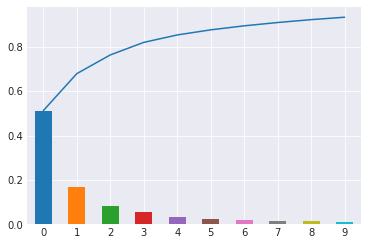

In [24]:
pd.Series(pca.explained_variance_ratio_).plot.bar()
pd.Series(np.cumsum(pca.explained_variance_ratio_)).plot()

In [25]:
df_pca

array([[-9.24336913e+00, -7.60765969e+00,  1.83708463e+01, ...,
        -5.87480358e-01, -6.41572645e+00, -1.49225663e+00],
       [ 1.57396855e+00, -5.81642788e+00, -1.29729001e+00, ...,
        -2.87512329e+00,  3.89808579e+00,  1.32110637e+00],
       [-9.52673602e+00, -7.44030375e+00,  2.06246446e+01, ...,
        -3.99561078e-01, -6.75212101e+00, -1.93907098e+00],
       ...,
       [ 2.69038957e+01,  1.74928685e+01,  3.37881471e+00, ...,
        -1.31009687e+00,  2.38282326e+00,  1.45070177e+00],
       [ 2.44729210e+01,  2.71933382e+01,  2.73705406e+00, ...,
         9.00403317e-01,  1.94461594e+00,  2.08028225e+00],
       [-3.67429297e+00, -5.79976398e+00,  5.59797380e+00, ...,
        -3.40356259e+00, -1.99108766e-02, -1.86831949e+00]])

In [26]:
# Split the features (df_pca) and loan_status data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_pca, loan_status, test_size = 0.2, random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def train_predict_anil(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
       
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train, learner.predict(X_train))
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, learner.predict(X_test))
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train, learner.predict(X_train), beta=0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, learner.predict(X_test), beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

"""
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
print(result)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
print(result)

k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)
clf = GaussianNB()
print(cross_val_score(clf, df_pca, loan_status, cv=k_fold))
    

k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)
clf = DecisionTreeClassifier()
print(cross_val_score(clf, df_pca, loan_status, cv=k_fold))
"""

Training set has 664548 samples.
Testing set has 166137 samples.


'\nfrom sklearn.naive_bayes import GaussianNB\nclf = GaussianNB()\nresult = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)\nprint(result)\n\nfrom sklearn.tree import DecisionTreeClassifier\nclf = DecisionTreeClassifier()\nresult = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)\nprint(result)\n\nk_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)\nclf = GaussianNB()\nprint(cross_val_score(clf, df_pca, loan_status, cv=k_fold))\n    \n\nk_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)\nclf = DecisionTreeClassifier()\nprint(cross_val_score(clf, df_pca, loan_status, cv=k_fold))\n'

In [27]:
"""
for pca_comp in range(1,26):
    print("PCA component size: " + str(pca_comp))
    pca = decomposition.PCA(n_components=pca_comp)
    pca.fit(features)
    df_pca = pca.transform(features)
    X_train, X_test, y_train, y_test = train_test_split(df_pca, loan_status, test_size = 0.2, random_state = 0)
    
    k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)
    clf = GaussianNB()
    print(cross_val_score(clf, df_pca, loan_status, cv=k_fold))
    
    k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)
    clf = DecisionTreeClassifier()
    print(cross_val_score(clf, df_pca, loan_status, cv=k_fold))
"""

'\nfor pca_comp in range(1,26):\n    print("PCA component size: " + str(pca_comp))\n    pca = decomposition.PCA(n_components=pca_comp)\n    pca.fit(features)\n    df_pca = pca.transform(features)\n    X_train, X_test, y_train, y_test = train_test_split(df_pca, loan_status, test_size = 0.2, random_state = 0)\n    \n    k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)\n    clf = GaussianNB()\n    print(cross_val_score(clf, df_pca, loan_status, cv=k_fold))\n    \n    k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)\n    clf = DecisionTreeClassifier()\n    print(cross_val_score(clf, df_pca, loan_status, cv=k_fold))\n'

In [28]:
print(df_pca.shape)
print(df.shape)
# features = features[0:95]
# loan_status = loan_status[0:95]
print(features.shape)
print(loan_status.shape)

(830685, 10)
(830685, 221)
(830685, 220)
(830685,)


In [ ]:
## From http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

"""
"Linear SVM", "RBF SVM", "Gaussian Process", "Nearest Neighbors",
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    KNeighborsClassifier(3),
 """    

classifiers = [DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]
    
print("PCA data")
print("=============")
for pca_comp in range(1,26):
    print("PCA component size: " + str(pca_comp))
    pca = decomposition.PCA(n_components=pca_comp)
    pca.fit(features)
    features_pca = pca.transform(features)
    print(features_pca.shape)
    print(features_pca)
    ###### StandardScalar
    for name, clf in zip(names, classifiers):
        print(name)
        #### features_pca =  StandardScaler().fit_transform(features_pca)
        X_train, X_test, y_train, y_test = train_test_split(features_pca, loan_status, test_size = 0.2, random_state = 0)
        result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
        print(result)

print("Original data")
print("=============")
print(features.shape)
print(features)
for name, clf in zip(names, classifiers):
    print(name)
    X_train, X_test, y_train, y_test = train_test_split(features, loan_status, test_size = 0.2, random_state = 0)
    result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
    print(result)


PCA data
PCA component size: 1
(830685, 1)
[[-9.24336913]
 [ 1.57396855]
 [-9.52673602]
 ...
 [26.9038957 ]
 [24.472921  ]
 [-3.67429297]]
Nearest Neighbors
KNeighborsClassifier trained on 664548 samples.
{'train_time': 2.068894386291504, 'pred_time': 0.4151923656463623, 'acc_train': 0.8371223749074559, 'acc_test': 0.7283386602623136, 'f_train': 0.8737499874553192, 'f_test': 0.8109863180407535}
Decision Tree
DecisionTreeClassifier trained on 664548 samples.
{'train_time': 0.7004122734069824, 'pred_time': 0.006885051727294922, 'acc_train': 0.7940735657920872, 'acc_test': 0.7929118739353666, 'f_train': 0.8281830175655353, 'f_test': 0.8272054898779121}
Random Forest
RandomForestClassifier trained on 664548 samples.
{'train_time': 6.495594263076782, 'pred_time': 0.0926826000213623, 'acc_train': 0.7940479844947242, 'acc_test': 0.7929660460944883, 'f_train': 0.8281602385529879, 'f_test': 0.8272185098626252}
Neural Net
MLPClassifier trained on 664548 samples.
{'train_time': 12.047913074493408

KNeighborsClassifier trained on 664548 samples.
{'train_time': 1.2793731689453125, 'pred_time': 5.074585676193237, 'acc_train': 0.8417495801657668, 'acc_test': 0.7339846030685518, 'f_train': 0.8777063576512314, 'f_test': 0.8150882239508568}
Decision Tree
DecisionTreeClassifier trained on 664548 samples.
{'train_time': 2.881612777709961, 'pred_time': 0.009153127670288086, 'acc_train': 0.7940524988413177, 'acc_test': 0.792960026965697, 'f_train': 0.8281643782642417, 'f_test': 0.827216386092919}
Random Forest
RandomForestClassifier trained on 664548 samples.
{'train_time': 6.6634697914123535, 'pred_time': 0.10845732688903809, 'acc_train': 0.7940479844947242, 'acc_test': 0.7929660460944883, 'f_train': 0.8281602385529879, 'f_test': 0.8272185098626252}
Neural Net
MLPClassifier trained on 664548 samples.
{'train_time': 15.840678215026855, 'pred_time': 0.33202624320983887, 'acc_train': 0.7940479844947242, 'acc_test': 0.7929660460944883, 'f_train': 0.8281602385529879, 'f_test': 0.82721850986262

GaussianNB trained on 664548 samples.
{'train_time': 0.23565053939819336, 'pred_time': 0.020003318786621094, 'acc_train': 0.7938824584529636, 'acc_test': 0.7928877974202014, 'f_train': 0.8281478876445774, 'f_test': 0.8272477962043334}
QDA
QuadraticDiscriminantAnalysis trained on 664548 samples.
{'train_time': 0.3279135227203369, 'pred_time': 0.02262401580810547, 'acc_train': 0.7916237803740287, 'acc_test': 0.7903718015854385, 'f_train': 0.8279143704491675, 'f_test': 0.826876401771549}
PCA component size: 9
(830685, 9)
[[-9.24336913e+00 -7.60765969e+00  1.83708463e+01 ...  7.22575232e+00
  -5.87479882e-01 -6.41572642e+00]
 [ 1.57396855e+00 -5.81642788e+00 -1.29729001e+00 ...  7.12213422e+00
  -2.87512441e+00  3.89808482e+00]
 [-9.52673602e+00 -7.44030375e+00  2.06246446e+01 ...  6.51067357e+00
  -3.99560677e-01 -6.75212097e+00]
 ...
 [ 2.69038957e+01  1.74928685e+01  3.37881471e+00 ... -2.42843213e+00
  -1.31009657e+00  2.38282354e+00]
 [ 2.44729210e+01  2.71933382e+01  2.73705406e+00 .

KNeighborsClassifier trained on 664548 samples.
{'train_time': 2.0911877155303955, 'pred_time': 69.66289591789246, 'acc_train': 0.8453038757170287, 'acc_test': 0.7362477954940801, 'f_train': 0.881105199571292, 'f_test': 0.8174495065805593}
Decision Tree
DecisionTreeClassifier trained on 664548 samples.
{'train_time': 6.921053886413574, 'pred_time': 0.011080265045166016, 'acc_train': 0.7940479844947242, 'acc_test': 0.7929660460944883, 'f_train': 0.8281602385529879, 'f_test': 0.8272185098626252}
Random Forest
RandomForestClassifier trained on 664548 samples.
{'train_time': 6.760010242462158, 'pred_time': 0.11119675636291504, 'acc_train': 0.7940479844947242, 'acc_test': 0.7929660460944883, 'f_train': 0.8281602385529879, 'f_test': 0.8272185098626252}
Neural Net
MLPClassifier trained on 664548 samples.
{'train_time': 19.485500812530518, 'pred_time': 0.39865970611572266, 'acc_train': 0.7940555084057134, 'acc_test': 0.7931225434430621, 'f_train': 0.8283267788700313, 'f_test': 0.82747711455480

GaussianNB trained on 664548 samples.
{'train_time': 0.6439614295959473, 'pred_time': 0.058705806732177734, 'acc_train': 0.7936537315588942, 'acc_test': 0.7924845157911844, 'f_train': 0.8292574287921075, 'f_test': 0.8283195932201676}
QDA
QuadraticDiscriminantAnalysis trained on 664548 samples.
{'train_time': 1.1097180843353271, 'pred_time': 0.06084036827087402, 'acc_train': 0.7808841498281539, 'acc_test': 0.7791340881320837, 'f_train': 0.8297914632936295, 'f_test': 0.8285711289144797}
PCA component size: 16
(830685, 16)
[[-9.24336913 -7.60765969 18.3708463  ...  0.22376374 -2.15108098
   2.60274186]
 [ 1.57396855 -5.81642788 -1.29729001 ... -3.62522122 -2.08018732
  -1.10480159]
 [-9.52673602 -7.44030375 20.62464459 ... -0.33879973 -2.11723234
   1.38921386]
 ...
 [26.9038957  17.49286852  3.37881471 ... -0.8110705   1.23198375
  -2.15979578]
 [24.472921   27.19333815  2.73705406 ... -0.23932497  1.81331134
  -0.54799691]
 [-3.67429297 -5.79976398  5.5979738  ... -0.28441852  3.2840155

RandomForestClassifier trained on 664548 samples.
{'train_time': 6.932939767837524, 'pred_time': 0.11431264877319336, 'acc_train': 0.7940479844947242, 'acc_test': 0.7929660460944883, 'f_train': 0.8281602385529879, 'f_test': 0.8272185098626252}
Neural Net
MLPClassifier trained on 664548 samples.
{'train_time': 24.359957456588745, 'pred_time': 0.40627002716064453, 'acc_train': 0.7943820461426413, 'acc_test': 0.7932850599204271, 'f_train': 0.8289397588920102, 'f_test': 0.8280038948883999}
AdaBoost
AdaBoostClassifier trained on 664548 samples.
{'train_time': 152.99993538856506, 'pred_time': 0.8504364490509033, 'acc_train': 0.7939486688696678, 'acc_test': 0.7930141991248186, 'f_train': 0.8291810488590117, 'f_test': 0.8282646862445395}
Naive Bayes
GaussianNB trained on 664548 samples.
{'train_time': 0.4814002513885498, 'pred_time': 0.04381752014160156, 'acc_train': 0.7931646773446012, 'acc_test': 0.7921775402228282, 'f_train': 0.8296791537918576, 'f_test': 0.8288025385133412}
QDA
QuadraticDi

KNeighborsClassifier trained on 664548 samples.
{'train_time': 3.8218891620635986, 'pred_time': 527.4962129592896, 'acc_train': 0.8488641903970819, 'acc_test': 0.7445361358396986, 'f_train': 0.8830667134112262, 'f_test': 0.8213245241641437}
Decision Tree
DecisionTreeClassifier trained on 664548 samples.
{'train_time': 12.732654333114624, 'pred_time': 0.015665531158447266, 'acc_train': 0.7940479844947242, 'acc_test': 0.7929660460944883, 'f_train': 0.8281602385529879, 'f_test': 0.8272185098626252}
Random Forest
RandomForestClassifier trained on 664548 samples.
{'train_time': 6.727238655090332, 'pred_time': 0.11658740043640137, 'acc_train': 0.7940479844947242, 'acc_test': 0.7929660460944883, 'f_train': 0.8281602385529879, 'f_test': 0.8272185098626252}
Neural Net
MLPClassifier trained on 664548 samples.
{'train_time': 28.18273138999939, 'pred_time': 0.47649288177490234, 'acc_train': 0.7946875169287997, 'acc_test': 0.7935679589736182, 'f_train': 0.8300396444492237, 'f_test': 0.8290763224994